<a href="https://colab.research.google.com/github/NayelySaldivar/Estimacion-probabilidad-conflicto-en-trayectorias-de-vuelos-paralelos/blob/main/Notebooks/Estimaci%C3%B3n_de_pi_con_Montecarlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problema:
Aproximar el valor de pi, simulando el lanzamiento de puntos de forma aleatoria  en un cuadraro de de lado 2 (área = 4) que tiene inscrito un círculo de radio 2(área = pi).

# Bibliotecas

In [1]:
import random
import numpy as np

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Puntos aleatorios ¿de qué tipo?
## ¿con qué distribución?

## Gaussiana

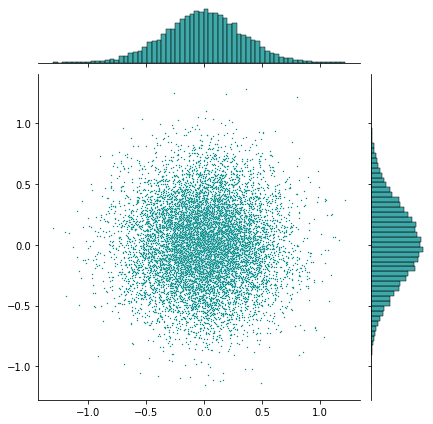

In [2]:
n = 10000
mu, sigma = 0., 1/3 
xs = np.random.normal(mu, sigma, n)
ys = np.random.normal(mu, sigma, n)

sns.jointplot(x = xs, y= ys, kind = 'scatter', color = 'darkcyan', s = 2 )
plt.show()


## Laplace

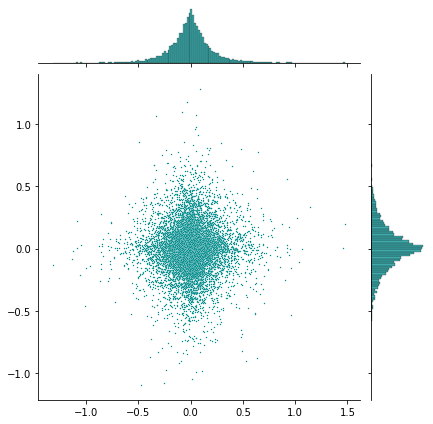

In [3]:
mu, scale = 0., 1/7 
xs = np.random.laplace(mu, scale, n)
ys = np.random.laplace(mu, scale, n)

sns.jointplot(x = xs, y = ys, kind = 'scatter', color = 'darkcyan', s = 2 )
plt.show()


## Uniforme

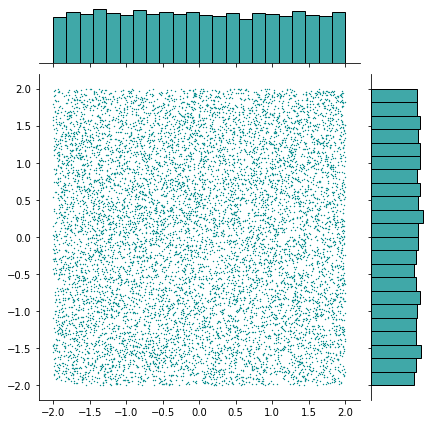

In [4]:
a, b = -2., 2.
xs= np.random.uniform(a, b, n) 
ys= np.random.uniform(a, b, n) 

sns.jointplot(x = xs, y= ys, kind = 'scatter', color = 'darkcyan', s = 2 )
plt.show()

# Solución

In [9]:
#Generación de las coordenadas aleatorias
n=1000
a, b = -1., 1.
xs = np.random.uniform(low=a, high=b, size=n) 
ys = np.random.uniform(low=a, high=b, size=n) 

# Construimos un vector para cada punto que indique si éste cayó o no adentro
# del círculo.
en_circulo = np.where((np.sqrt(xs**2 + ys**2) <= 1), 1, 0)

puntos_circulo = en_circulo.sum()
puntos_circulo

776

¿Cuántos puntos están en el cuadrado?
Si relacionamos los puntos que están dentro del círculo con el área del círculo y los que están dentro del cuadraro, con el area del cuadraro, podemos decir que :

$ \frac{puntos_{círculo}}{puntos_{cuadraro}}= \frac{\pi}{4}$

In [12]:
4*puntos_circulo/n

3.104

In [13]:
def calcula_pi(n, print_results=True):
  '''Se lanzan puntos aleatorios con distribución uniforme en un cuadraro de
  de lado 2 (área = 4) que tiene inscrito un círculo de radio 2(área = pi)
  n: número de puntos que se lanzarán al tapete'''
  
  #Generación de las coordenadas aleatorias
  a, b = -1., 1.
  xs = np.random.uniform(low=a, high=b, size=n) 
  ys = np.random.uniform(low=a, high=b, size=n) 

  # Construimos un vector para cada punto que indique si éste cayó o no adentro
  # del círculo.
  en_circulo = np.where((np.sqrt(xs**2 + ys**2)<=1), 1, 0)

  puntos_circulo = en_circulo.sum()
  puntos_cuadrado = n

  pi = 4* puntos_circulo/ puntos_cuadrado
  error = abs(np.pi-pi)

  if print_results==True:
    plt.figure(figsize=(6,6))
    sns.scatterplot( x = xs, y = ys, s = 4, hue = en_circulo )
    plt.legend([],[], frameon=False)
    plt.show()

    print('pi =', pi)
    print('error =', error)

  return pi


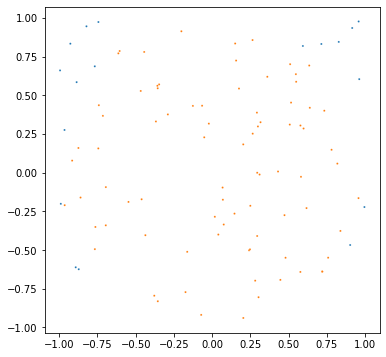

pi = 3.28
error = 0.1384073464102067


3.28

In [15]:
calcula_pi(100)

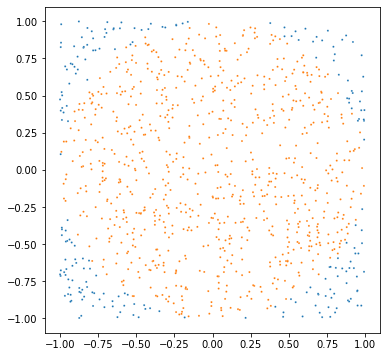

pi = 3.16
error = 0.018407346410207026


3.16

In [16]:
calcula_pi(1000)

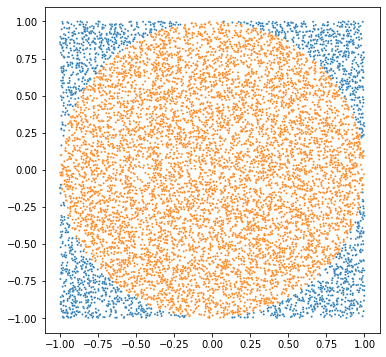

pi = 3.1416
error = 7.346410206832132e-06


3.1416

In [17]:
calcula_pi(10000)

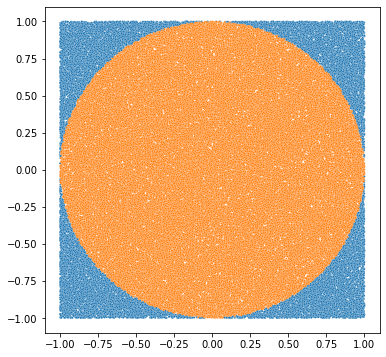

pi = 3.1458
error = 0.004207346410206814


3.1458

In [18]:
calcula_pi(100000)

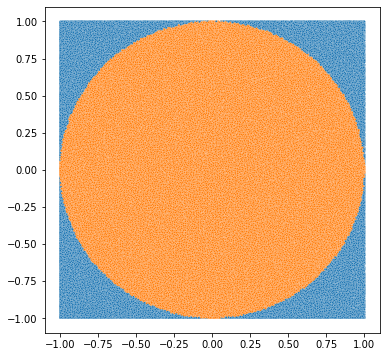

pi = 3.143508
error = 0.001915346410207075


3.143508

In [14]:
calcula_pi(1000000)

# Velocidad de convergencia

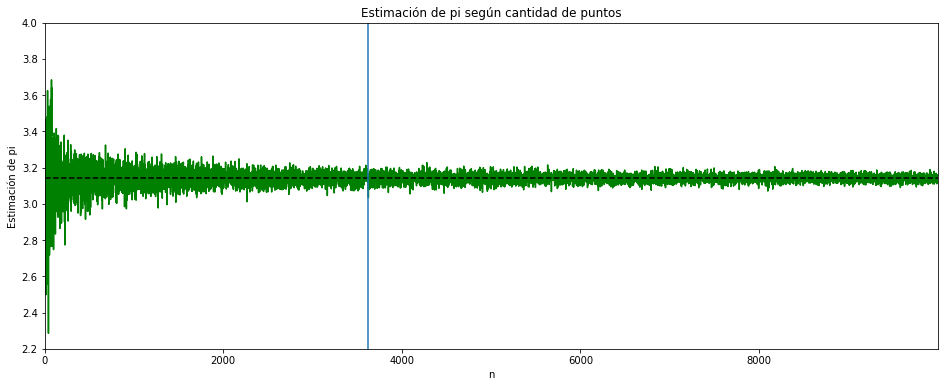

In [39]:
error =  .00001
ns = range(10, 10000)
pi_est = []

for n in ns:
  pi = calcula_pi(n, print_results=False)
  pi_est.append(pi)

df_aprox = pd.DataFrame([range(10,10000),pi_est], index = ['puntos','pi_aprox']).T
df_aprox['dif'] = np.pi - df_aprox.pi_aprox

punto_limite = df_aprox[abs(df_aprox.dif) < error].iloc[0].puntos

#Gráfica estimación de  pi vs pi
plt.figure(figsize=(16, 6))
plt.plot(ns, pi_est, color='g')
plt.axhline(y=np.pi, color='black', ls='--')
plt.axvline(x = punto_limite)
plt.xlim(0, ns[-1])
plt.ylim(2.2, 4)
plt.xlabel('n')
plt.ylabel('Estimación de pi')
plt.title('Estimación de pi según cantidad de puntos')
plt.show()